In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
!ls

__notebook__.ipynb  __output__.json


In [3]:
# getting the data
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* There are 891 passengers in the training set
* The survival rate was 38%
* Most of the passengers belonged to class 3
* The maximum Fare paid for a ticket was 512 however the fare prices varied a lot as we can see from the standard deviation of 49

In [7]:
# missing values in Age`

In [8]:
missing = train_df.isnull().sum().sort_values(ascending=False)

In [9]:
total = train_df.isnull().sum() / train_df.isnull().count() * 100
final = round(total,1).sort_values(ascending=False)
missing_data = pd.concat([missing, final], axis=1, keys=['Total', '%'],sort=True).head(5)
missing_data

,Total,%
Age,177,19.9
Cabin,687,77.1
Embarked,2,0.2
Fare,0,0.0
Name,0,0.0


The Embarked feature has only 2 missing values, which can easily be filled. It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values. The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing

In [10]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

## EDA - Visual Data Analysis

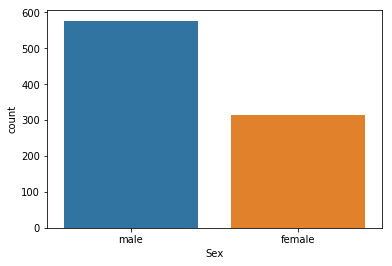

In [11]:
sns.countplot('Sex',data=train_df)

The number of males on board were clearly more than the female.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


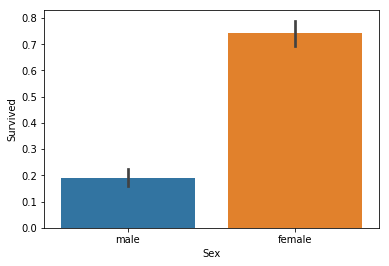

In [12]:
sns.barplot(x='Sex',y='Survived',data=train_df)

In [13]:
train_df.groupby(by='Sex',as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


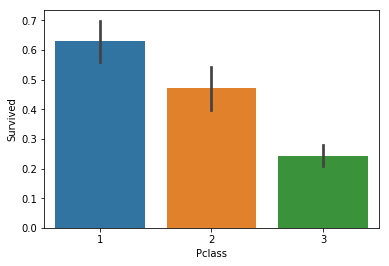

In [14]:
sns.barplot(x='Pclass',y='Survived',data=train_df)

In [15]:
train_df.groupby('Pclass',as_index=False)['Survived'].mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Passenger in `Pclass` 3 have lower chances of survival.Clearly Class had an effect on survival of each passenger with the percentages of survival being 62.96%, 47.28%, 24.23% for Pclass 1, 2 and 3 respectively. Thus, belonging to Pclass = 1 had a huge advantage.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


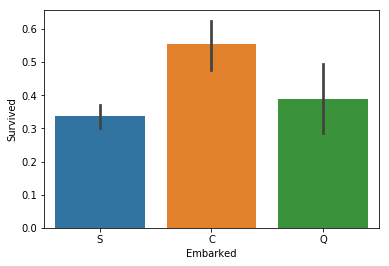

In [16]:
#Comparing the Embarked feature against Survived
sns.barplot(x='Embarked',y='Survived',data=train_df)
train_df[['Embarked','Survived']].groupby('Embarked',as_index=False).mean().sort_values(by='Survived'
                                                                                        ,ascending=False)

It seems that the passengers that embarked from port Cherbourg had a higher rate of Survival at 55%. This could be either due to their Sex or socio-economic class.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


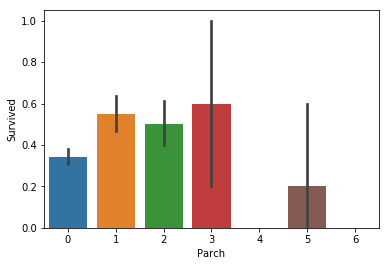

In [17]:
sns.barplot(x='Parch',y='Survived',data=train_df)

Looks like passengers who had either 1, 2 or 3 had a higher possibility of surviving than the ones had none. However having more than 3 made the possibility even lesser.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


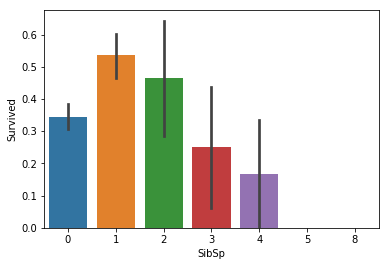

In [18]:
sns.barplot(x='SibSp',y='Survived',data=train_df)

It seems that having a spouse or 1 sibling had a positive effect on Survival as compared to being alone. Though the chances of survival go down with the number of siblings after 1.

Text(0,0.5,'Count')

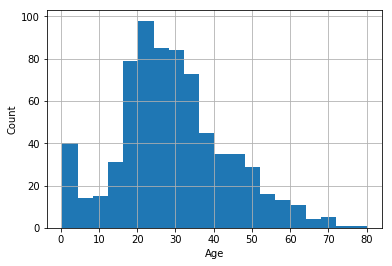

In [19]:
train_df.Age.hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Count')

It is obvious to assume that younger individuals were more likely to survive, however we should test our assumption before we proceed.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


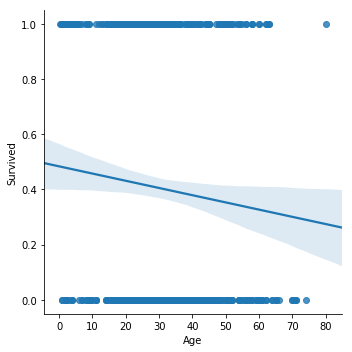

In [20]:
sns.lmplot(x='Age',y='Survived',data=train_df,palette='Set1')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


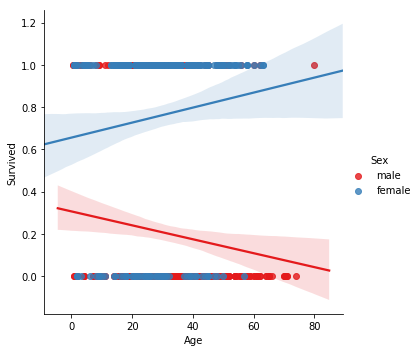

In [21]:
sns.lmplot(x='Age',y='Survived',data=train_df,palette='Set1',hue='Sex')

Interestingly, age has an opposite effect on the survival in men and women. The chances of survival increase as the age of women increases.

Takeaway: Age feature can have a different effect on the outcome depending on the sex of the passenger. Perhaps we can use this information in feature engineering

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


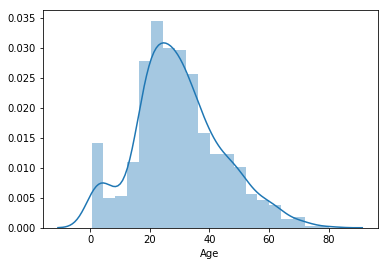

In [22]:
sns.distplot(train_df['Age'].dropna())

,Sex,Age
0,female,27.0
1,male,29.0


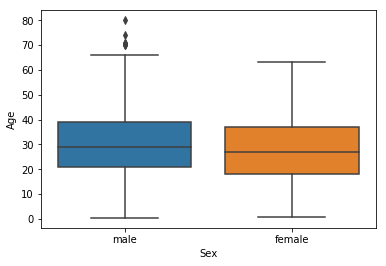

In [23]:
#Checking for outliers in Age data
sns.boxplot(x='Sex',y='Age',data=train_df)

#getting the median age according to Sex
train_df.groupby('Sex',as_index=False)['Age'].median()

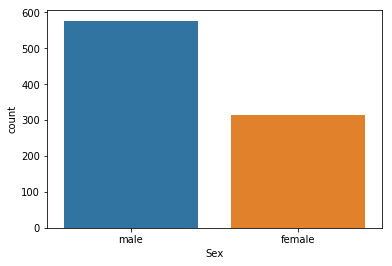

In [24]:
sns.countplot(x='Sex',data=train_df)

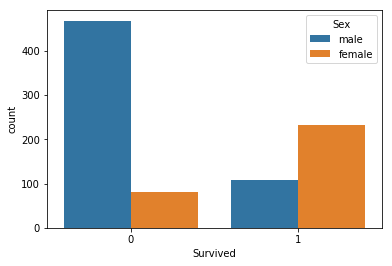

In [25]:
sns.countplot(x='Survived',hue='Sex',data=train_df)

In [26]:
train_df.describe(include='O')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Stahelin-Maeglin, Dr. Max",male,1601,B96 B98,S
freq,1,577,7,4,644


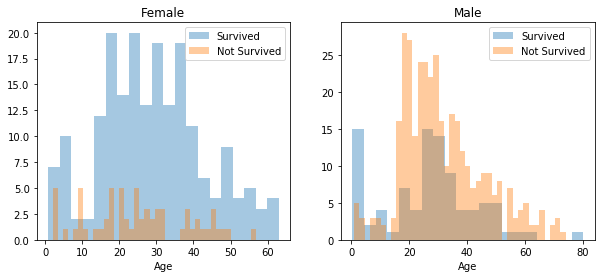

In [27]:
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
ax = sns.distplot(women[women['Survived'] == 1].Age.dropna(),label='Survived',bins=20,ax=axes[0],kde=False)
ax = sns.distplot(women[women['Survived'] == 0].Age.dropna(),label='Not Survived',bins=40,ax=axes[0],kde=False)
ax.set_title('Female')
ax.legend()
ax = sns.distplot(men[men['Survived'] == 1].Age.dropna(),label='Survived',bins=20,ax=axes[1],kde=False)
ax = sns.distplot(men[men['Survived'] == 0].Age.dropna(),label='Not Survived',bins=40,ax=axes[1],kde=False)
ax.set_title('Male')
ax.legend()

Females between `Age` of 15 and 40 had high chances of survival. Also we can notice that females infants/toddlers also had a higher chance of survival. This may be because females have given preference while embarking. 

While Males between `Age` of 20 and 35 had higher chances of survival. This is almost same as women

People who travelled in first class had higher chances of survival ( they were housed in upper decks of the ship ). 

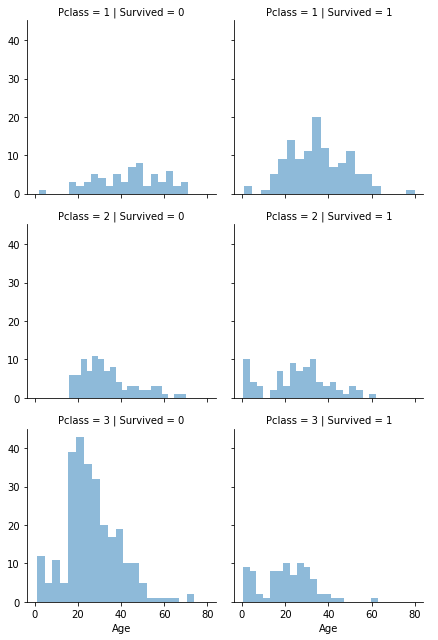

In [28]:
g = sns.FacetGrid(data=train_df,col='Survived',row='Pclass')
g.map(plt.hist,'Age',alpha=.5, bins=20)
g.add_legend()

In [29]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


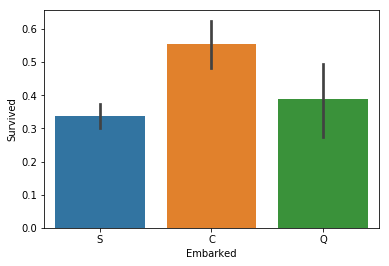

In [30]:
sns.barplot(x='Embarked',y='Survived',data=train_df)

In [31]:
train_df.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

### Data Pre-processing

In [32]:
train_df = train_df.drop(['PassengerId'],axis=1)

In [33]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [34]:
test_passenger_id = pd.DataFrame(test_df.PassengerId)
test_passenger_id.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [35]:
test_df=test_df.drop(['PassengerId'],axis=1)

## Missing data - Cabin

We have 687 records missing in `Cabin` category, which is almost 77% of the data. Looks like we can drop those

In [36]:
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

#### Age

In [37]:
train_df.Age.median()

28.0

In [38]:
train_df.Age.fillna(train_df.Age.median(),inplace=True)

In [39]:
train_df.Age.isnull().sum()

0

In [40]:
test_df.Age.fillna(test_df.Age.median(),inplace=True)

In [41]:
data = [train_df, test_df] # turning into list and adding 'relatives' column to dataframe
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset["IsAlone"] = np.where(dataset["relatives"] > 0, 0,1)
train_df['IsAlone'].value_counts()    

1    537
0    354
Name: IsAlone, dtype: int64

In [42]:
#dropping the Name,SibSP and Parch columns
for dataset in data:
    dataset.drop(['SibSp','Parch'],axis=1,inplace=True)

In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null float64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     889 non-null object
relatives    891 non-null int64
IsAlone      891 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


### Embark data

In [44]:
top_value = 'S'
data = [train_df,test_df]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(top_value)

### Converting Features:

In [45]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null float64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     891 non-null object
relatives    891 non-null int64
IsAlone      891 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


`Fare` is a float and we have to deal with 4 categorical features: `Name, Sex, Ticket` and `Embarked`

In [46]:
### Fare
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [47]:
data = [train_df,test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir',
                                                 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


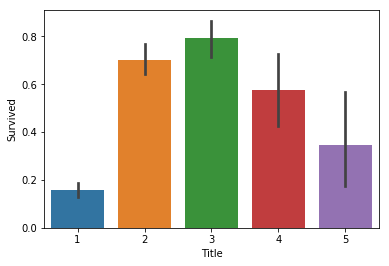

In [48]:
sns.barplot(x='Title',y='Survived',data=train_df,)

The above plot shows the survival chance of women is higher, followed by infants/kids

### Sex:

In [49]:
gender = {'male':0,'female':1}
data = [train_df, test_df]
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(gender)

### Dropping ticket 

In [50]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

### Embarked:

In [51]:
train_df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [52]:
ports = {'S':0,'C':1,'Q':77}
data = [train_df, test_df]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

#### Dropping Cabin:

In [53]:
## Converting Age from float to integer
train_df['Age'] = train_df['Age'].astype(int)

Age and Fare columns have continuous data and there might be fluctuations that do not reflect patterns in the data, which might be noise. Categorizing every age into a group. 

In [54]:
train_df['AgeGroup'] = pd.qcut(train_df.Age,6,labels=False)
test_df['AgeGroup'] = pd.qcut(test_df.Age,6,labels=False)

In [55]:
train_df['Fare'] = pd.qcut(train_df.Fare,5,labels=False)
test_df['Fare'] = pd.qcut(test_df.Fare,5,labels=False)

In [56]:
train_df.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,relatives,IsAlone,Title,AgeGroup
0,0,3,0,22,0,0,1,0,1,1
1,1,1,1,38,4,1,1,0,3,4
2,1,3,1,26,0,0,0,1,2,2
3,1,1,1,35,4,0,1,0,3,4
4,0,3,0,35,1,0,0,1,1,4


### Building Models

#### 1. Logistic Regression

In [57]:
#Splitting out training data into X: features and y: target
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]

In [58]:
#splitting our training data again in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=123)

In [59]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(y_pred,y_test)*100,2)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [60]:
cv_scores = cross_val_score(logreg,X,y,cv=5)
np.mean(cv_scores)*100

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

80.36385727007041

Age plays has importance in Randomn Forest algorithm. **Is Alone** can be dropped it seems

#### 2. Random Forest
    

In [61]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [62]:
accu_rf = rf.score(X_train,y_train)
accu_rf = round(accu_rf*100,2)
accu_rf

95.35

In [63]:
# Displaying the important features
imp_features = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
imp_features = imp_features.sort_values('importance',ascending=False).set_index('feature')
imp_features.head(10)

,importance
feature,
Age,0.244
Title,0.185
Sex,0.151
Fare,0.108
Pclass,0.100
relatives,0.080
AgeGroup,0.070
Embarked,0.045
IsAlone,0.017


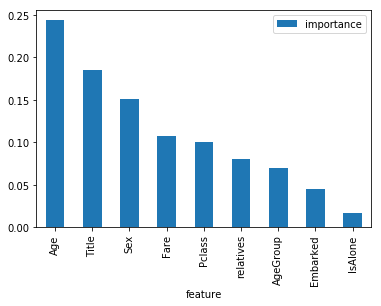

In [64]:
imp_features.plot.bar()

### 3. Decision Tree

In [65]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
accu_dt = dt.score(X_train,y_train)
accu_dt = round(accu_dt*100,2)
accu_dt

95.35

#### 4. KNN

In [66]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
accu_knn = knn.score(X_train,y_train)
accu_knn = round(accu_knn*100,2)
accu_knn

84.75

#### 5. Gaussian NB

In [67]:
nb = GaussianNB()
nb.fit(X_train,y_train)
accu_nb = nb.score(X_train,y_train)
accu_nb = round(accu_nb*100,2)
accu_nb

79.45

In [68]:
results = pd.DataFrame({
    'Model':['Linear Reg.','Random Forest','Decision Trees','K-Nearest Neighbours','Naive Bayes'],
    'Accuracy':[acc_logreg,accu_rf,accu_dt,accu_knn,accu_nb]
})
results.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy
1,Random Forest,95.35
2,Decision Trees,95.35
3,K-Nearest Neighbours,84.75
4,Naive Bayes,79.45
0,Linear Reg.,79.10


In [69]:
y_final = rf.predict(test_df)
submission = pd.DataFrame({
    'PassengerId': test_passenger_id['PassengerId'],
    'Survived': y_final
})
submission.head()
submission.to_csv('titanic_rf.csv', index=False)